In [45]:
import numpy as np

from tb.HTB import HierarchicalTokenBucket
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
htb = HierarchicalTokenBucket(100, 100, 2)

traffic = list(zip(np.arange(0, 10_000, 100), np.random.poisson(3, 100), np.random.poisson(5, 100)))  # tier-1: 50 TPS, tier-2: 100 TPS * 10 seconds

throttle = np.array([(ticker, tier_1_request, tier_2_request, *htb.acquire(ticker, [tier_1_request, tier_2_request])) for (ticker, tier_1_request, tier_2_request) in traffic])

# Swap columns -> ticker, tier_1_request, tier_1_goodput, tier_2_request, tier_2_goodput
throttle[:, [2, 3]] = throttle[:, [3, 2]]

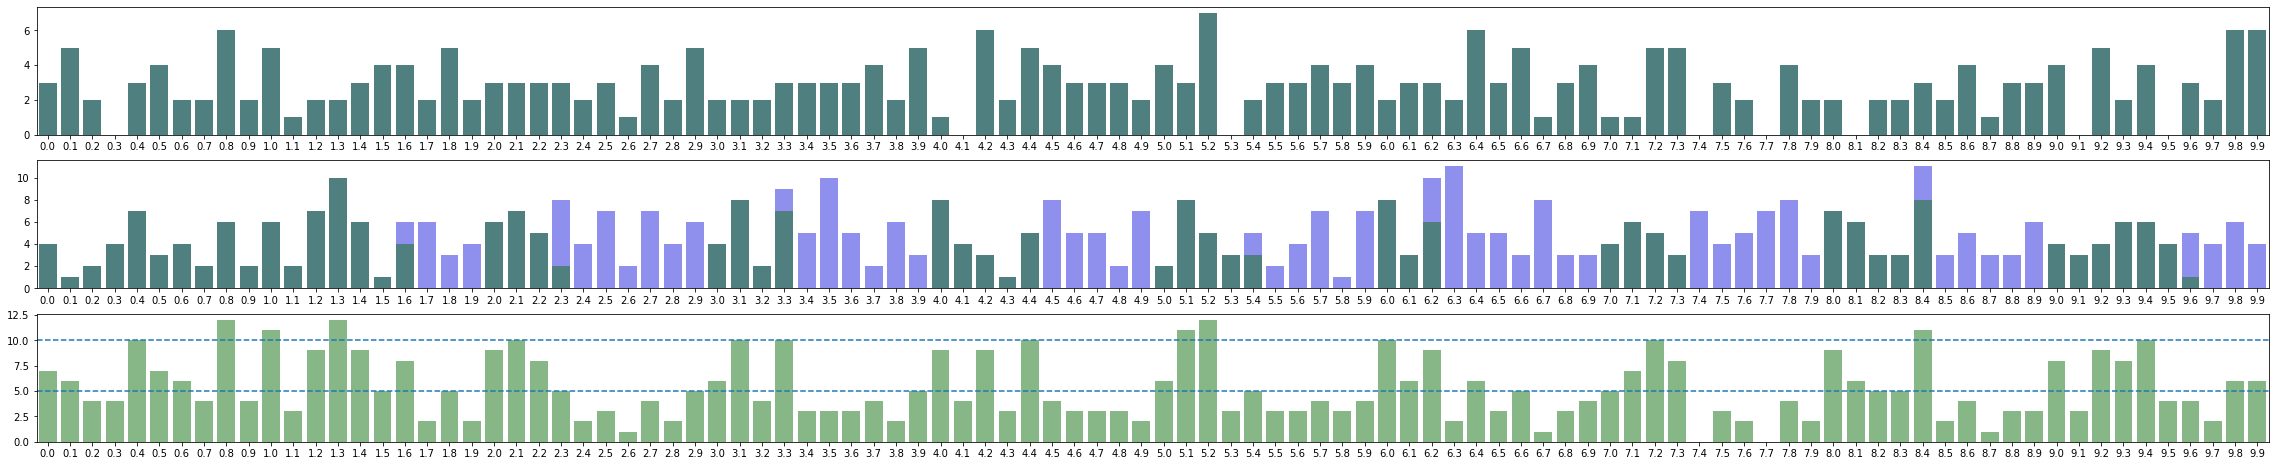

In [53]:
f, axes = plt.subplots(3, 1, figsize=(40, 8))

sns.barplot(x=throttle[:, 0] / 1000.0, y=throttle[:, 1], color='b', alpha=.5, ax=axes[0])
sns.barplot(x=throttle[:, 0] / 1000.0, y=throttle[:, 2], color='g', alpha=.5, ax=axes[0])

sns.barplot(x=throttle[:, 0] / 1000.0, y=throttle[:, 3], color='b', alpha=.5, ax=axes[1])
sns.barplot(x=throttle[:, 0] / 1000.0, y=throttle[:, 4], color='g', alpha=.5, ax=axes[1])

sns.barplot(x=throttle[:, 0] / 1000.0, y=throttle[:, 2] + throttle[:, 4], color='g', alpha=.5, ax=axes[2])

axes[2].axhline(5, ls='--')
axes[2].axhline(10, ls='--')

plt.show()
